In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob,Word

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import texthero as hero
#from texthero import stopwords
from nltk.corpus import stopwords
from nltk.corpus import words
import os
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word
from sklearn.feature_extraction.text import CountVectorizer

import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models

#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('words')

In [328]:
df_raw = pd.read_csv('/Users/ak/Desktop/neuefische/NLPower-capstone-project/data/nlp-getting-started/train.csv')
df = df_raw

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [266]:
df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


<AxesSubplot:>

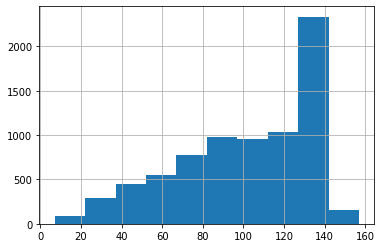

In [267]:
#No. characters per tweet
df['text'].str.len().hist()

<AxesSubplot:>

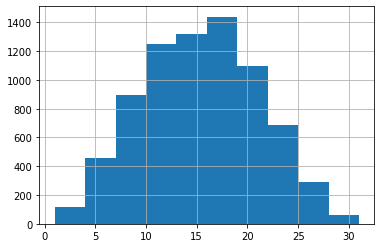

In [268]:
#No. words per tweet
text = df['text']
text.str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

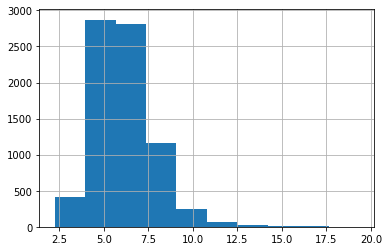

In [269]:
#Average word length
text.str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [270]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))


In [271]:
corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [272]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

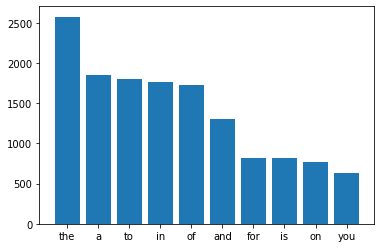

In [273]:
plot_top_stopwords_barchart(df['text'])

In [274]:
def lemma_per_pos(sent):
    '''function to lemmatize according to part of speech tag'''
    t = TextBlob(sent)
    t_dict = {"J": 'a',"N": 'n',"V": 'v',"R": 'r'}
    w_n_t = [(w, t_dict.get(p[0], 'n')) for w, p in t.tags]
    setofwords = set(words.words())
    lemmatized_list = [w.lemmatize(t) for w, t in w_n_t if w in setofwords]
    return " ".join(lemmatized_list)
def df_preprocessing(df,col_name):
    my_stopwords = stopwords.words('english') + ['http', 'co', 'amp', 'one', 'get', 'u']
    df[col_name]=[text.replace('<br','') for text in df[col_name]]
    # cleaning
    df[col_name]= (
              df[col_name]
              .pipe(hero.clean)
              .pipe(hero.remove_html_tags)
              .pipe(hero.remove_brackets)
              .pipe(hero.remove_urls))
    # lemmatization
    df[col_name]= [lemma_per_pos(sent) for sent in df[col_name]]
    df[col_name]=hero.remove_stopwords(df[col_name],my_stopwords)
    

In [275]:
df_preprocessing(df, 'text')

In [276]:
corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<AxesSubplot:>

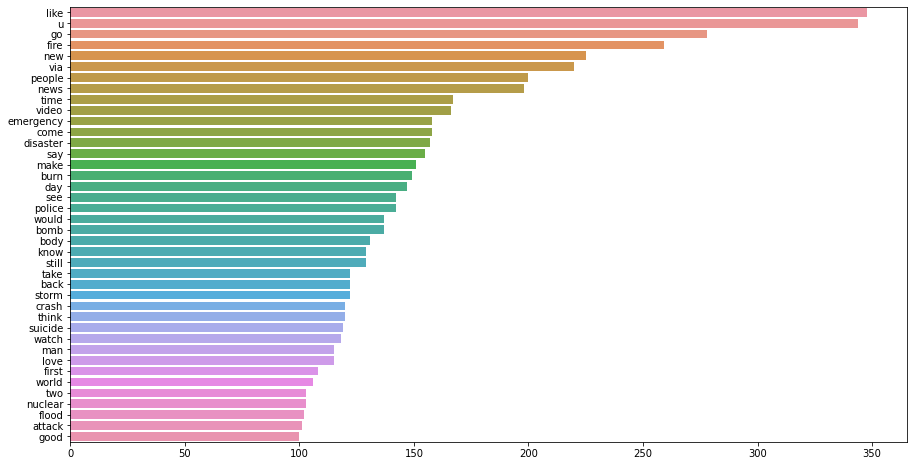

In [277]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(15,8))
sns.barplot(x=y,y=x)

In [332]:

text= ' '.join(t for t in df['text'])
words_list= text.split()

In [333]:
word_freq= {}
for word in set(words_list):
    word_freq[word]= words_list.count(word)
#Creating dataframe of words
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])

In [334]:
df_word['word_len']= df_word['word'].map(lambda x: len(x))
# sorting values 
df_word=df_word.sort_values('word_len',ascending=False).reset_index(drop=True)
df_word

,word,count,word_len
0,indistinguishable,1,17
1,institutionalize,1,16
2,multidimensional,1,16
3,diversification,1,15
4,competitiveness,1,15
...,...,...,...
5938,p,42,1
5939,g,10,1
5940,z,4,1
5941,w,78,1


/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count', ylabel='word'>

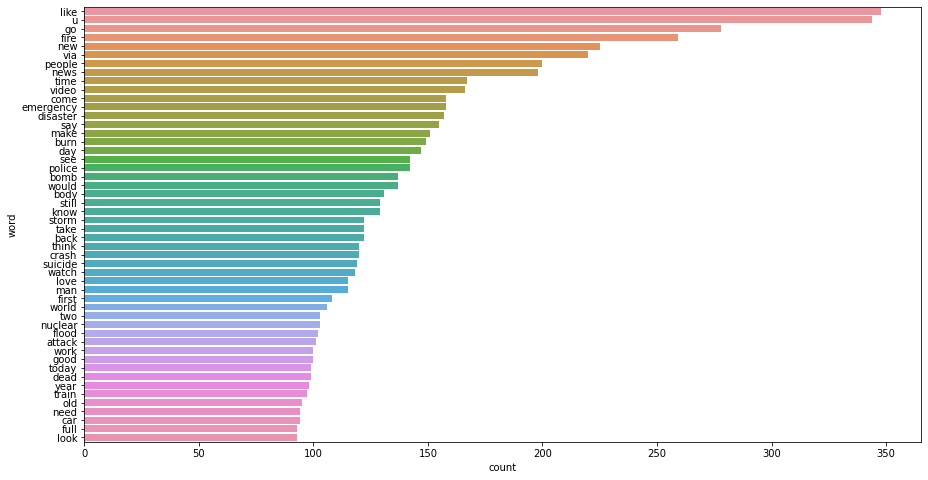

In [282]:
df_top= df_word.head(50)
plt.figure(figsize=(15,8))
sns.barplot(df_top['count'],df_top['word'])

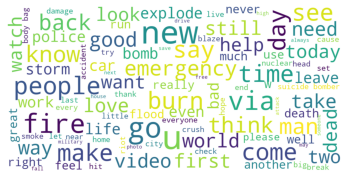

In [283]:
wordcloud = WordCloud(background_color="white",max_words=100,
                      max_font_size=40,
                      scale=3,
                      random_state=1).generate(text)
plt.axis('off')
plt.imshow(wordcloud)

In [284]:
TextBlob(df['text'][8]).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

<AxesSubplot:>

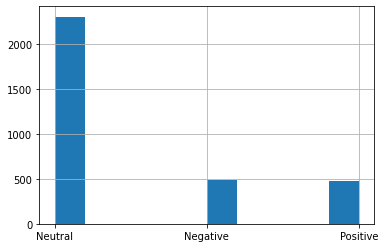

In [335]:
def polarity(x):
    if TextBlob(x).sentiment[0]<-0.1:
       return 'Negative'
    if TextBlob(x).sentiment[0]>0.1:
       return 'Positive'
    return 'Neutral'
df['sentiment']= df['text'].map(lambda x: polarity(x))
df['sentiment'][df['target'] == 1].hist()

<AxesSubplot:>

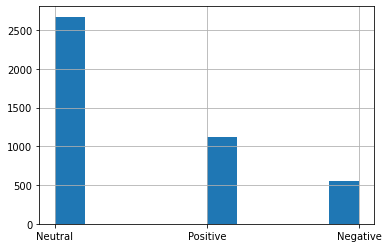

In [336]:
df['sentiment'][df['target'] == 0].hist()

In [286]:
df

,id,keyword,location,text,target,sentiment
0,1,NaN,NaN,reason earthquake may forgive u,1,Neutral
1,4,NaN,NaN,forest fire near la canada,1,Neutral
2,5,NaN,NaN,shelter place notify evacuation shelter place,1,Neutral
3,6,NaN,NaN,people receive evacuation,1,Neutral
4,7,NaN,NaN,sent photo ruby smoke school,1,Neutral
...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant hold bridge collapse nearby,1,Neutral
7609,10870,NaN,NaN,aria control wild even northern part state tro...,1,Neutral
7610,10871,NaN,NaN,volcano,1,Neutral
7611,10872,NaN,NaN,police investigate e bike car little e bike ri...,1,Negative


In [293]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

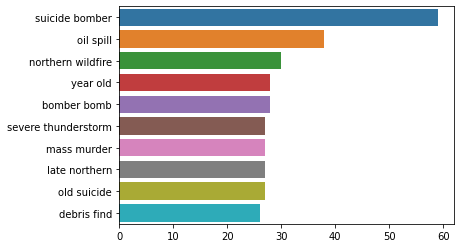

In [297]:
top_n_bigrams=get_top_ngram(df['text'][df['target'] == 1],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

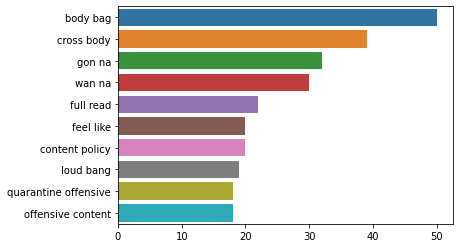

In [298]:
top_n_bigrams=get_top_ngram(df['text'][df['target'] == 0],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

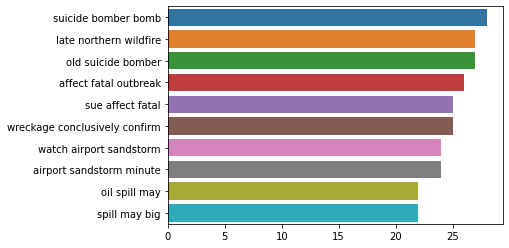

In [302]:
top_n_bigrams=get_top_ngram(df['text'][df['target'] == 1],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [320]:

def preprocess_tweets(x):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tweets in x:
        words=[w for w in word_tokenize(str(x)) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_tweets(df['text'])

In [321]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [337]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.046*"..." + 0.036*"shelter" + 0.034*"bike" + 0.034*"place" + 0.031*"northern" + 0.030*"evacuation" + 0.019*"state" + 0.018*"two" + 0.018*"investigate" + 0.018*"notify"'),
 (1,
  '0.052*"..." + 0.034*"evacuation" + 0.032*"northern" + 0.032*"place" + 0.031*"bike" + 0.031*"shelter" + 0.018*"earthquake" + 0.018*"little" + 0.018*"7609" + 0.017*"ruby"'),
 (2,
  '0.048*"..." + 0.035*"northern" + 0.035*"evacuation" + 0.034*"place" + 0.034*"bike" + 0.031*"shelter" + 0.018*"wild" + 0.017*"Length" + 0.017*"smoke" + 0.017*"giant"'),
 (3,
  '0.048*"..." + 0.034*"northern" + 0.034*"shelter" + 0.033*"evacuation" + 0.032*"place" + 0.032*"bike" + 0.018*"people" + 0.017*"7608" + 0.017*"investigate" + 0.017*"near"'),
 (4,
  '0.052*"..." + 0.036*"northern" + 0.033*"evacuation" + 0.032*"place" + 0.032*"bike" + 0.030*"shelter" + 0.019*"canada" + 0.018*"part" + 0.018*"reason" + 0.017*"two"'),
 (5,
  '0.052*"..." + 0.035*"shelter" + 0.032*"evacuation" + 0.032*"place" + 0.032*"bike" + 0.030*"northern

In [338]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ak/Desktop/neuefische/NLPower-capstone-project/.venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.000822  0.000002       1        1  11.353368
1      0.001049 -0.000476       2        1  11.288198
6      0.000787  0.000072       3        1  11.264487
2      0.001529  0.000103       4        1  11.216854
8      0.000768 -0.000008       5        1  11.127632
4      0.001350 -0.000324       6        1  10.960670
0      0.000687  0.000615       7        1  10.938586
5      0.001126  0.000168       8        1  10.877856
7      0.000749 -0.000129       9        1  10.811058
9     -0.008867 -0.000024      10        1   0.161291, topic_info=          Term         Freq         Total Category  logprob  loglift
14    collapse  7617.000000   7617.000000  Default  30.0000  30.0000
47       state  7616.000000   7616.000000  Default  29.0000  29.0000
4         7611  7613.000000   7613.000000  Default  28.0000  28.0000
12      canada  7611.000000   7611.000000  Default  27.0000  27.0000
33      notify  7607.000000   7607.000000  Default  26.0000  26.0000
..         ...          ...           ...      ...      ...      ...
45     shelter    14.179585  15214.362479  Topic10  -3.9670  -0.5485
18  evacuation    14.089326  15221.257942  Topic10  -3.9734  -0.5553
32    northern    14.070414  15208.558933  Topic10  -3.9747  -0.5558
10        bike    14.051765  15212.548931  Topic10  -3.9760  -0.5574
38       place    14.031172  15210.773914  Topic10  -3.9775  -0.5588

[365 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.110795       ...
0         2  0.119605       ...
0         3  0.109481       ...
0         4  0.109875       ...
0         5  0.108210       ...
...     ...       ...       ...
53        6  0.105446  wildfire
53        7  0.108991  wildfire
53        8  0.109254  wildfire
53        9  0.108335  wildfire
53       10  0.001838  wildfire

[540 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 3, 9, 5, 1, 6, 8, 10])